In [70]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import copy
import glob
import imageio

In [37]:
main_video = cv.VideoCapture('media/sample_1280x720.avi')
hidden_video = cv.VideoCapture('media/sample_640x360.avi')

In [38]:
def hide_frame(img_off, img_hid):
    bufor_off = copy.deepcopy(img_off)
    bufor_hid = np.zeros(img_off.shape, dtype = int)
    bufor_hid[:img_hid.shape[0], :img_hid.shape[1],:] = copy.deepcopy(img_hid)
    return(bufor_off & 0xf0 | bufor_hid >> 4)
    
def decypher_frame(img_dec):
    return((img_dec & 0xf) << 4)

In [82]:
main_video = cv.VideoCapture('media/sample_1280x720.avi')
hidden_video = cv.VideoCapture('media/sample_640x360.avi')
counter = 0
while(main_video.isOpened()):
    main_ret, main_frame = main_video.read()
    hidden_ret, hidden_frame = hidden_video.read()
    if main_ret:
        enhanced_frame = hide_frame(main_frame, hidden_frame) if hidden_ret else hide_frame(main_frame, main_frame)
        cv.imwrite("temp/frame%d.png" % counter, enhanced_frame)
    else:
        break
    counter += 1

In [75]:
#out = cv.VideoWriter('output_video.mp4',cv.VideoWriter_fourcc('m', 'p', '4', 'v'), 24, (1280, 720), 0)
image_list = []
for filename in glob.glob('temp/*.png'):
    img = cv.imread(filename)
    image_list.append(img)
    #out.write(img)

#out.release()

imageio.mimsave('video.gif', image_list, fps=24)

In [74]:
encrypted_gif = imageio.mimread("video.gif") # memtest=False
counter = 0
for i in range(len(encrypted_gif)):
    if ret:
        decyphered_frame = decypher_frame(encrypted_gif[i])
        cv.imwrite("temp_decypher/frame%d.png" % counter, decyphered_frame)
    else:
        break
    counter += 1

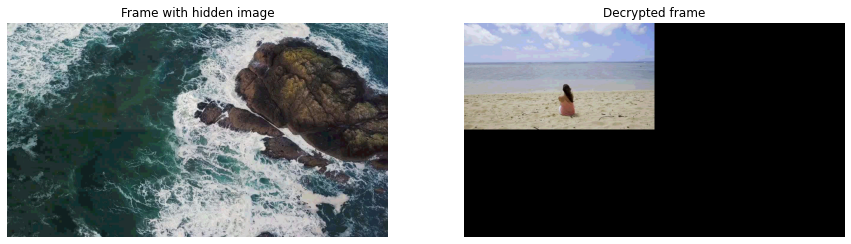

In [87]:
fig = plt.figure(figsize=(15, 17))
fig.add_subplot(1, 2, 1)
plt.imshow(cv.imread('temp/frame0.png')[:,:,::-1])
plt.axis('off')
plt.title("Frame with hidden image")
fig.add_subplot(1, 2, 2)
plt.imshow(decypher_frame(cv.imread('temp/frame0.png'))[:,:,::-1])
plt.axis('off')
plt.title("Decrypted frame")
plt.show()